In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display all columns in the dataset
pd.set_option('display.max_columns', None)


In [ ]:
# Load the dataset
df = pd.read_csv("/content/food_data.csv")

# Display basic info and first few rows
print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())


Shape of the dataset: (160478, 8)

First 5 rows:
   fdc_id           data_type            description  food_category_id  \
0  319874         sample_food  HUMMUS, SABRA CLASSIC              16.0   
1  319875  market_acquisition  HUMMUS, SABRA CLASSIC              16.0   
2  319876  market_acquisition  HUMMUS, SABRA CLASSIC              16.0   
3  319877     sub_sample_food                 Hummus              16.0   
4  319877     sub_sample_food                 Hummus              16.0   

  publication_date         description_category  nutrient_id  amount  
0       2019-04-01  Legumes and Legume Products          NaN     NaN  
1       2019-04-01  Legumes and Legume Products          NaN     NaN  
2       2019-04-01  Legumes and Legume Products          NaN     NaN  
3       2019-04-01  Legumes and Legume Products       1051.0   56.30  
4       2019-04-01  Legumes and Legume Products       1002.0    1.28  



Missing Values in Each Column:
fdc_id                      0
data_type                   0
description                 8
food_category_id         1922
publication_date            0
description_category     1922
nutrient_id             10863
amount                  10890
dtype: int64


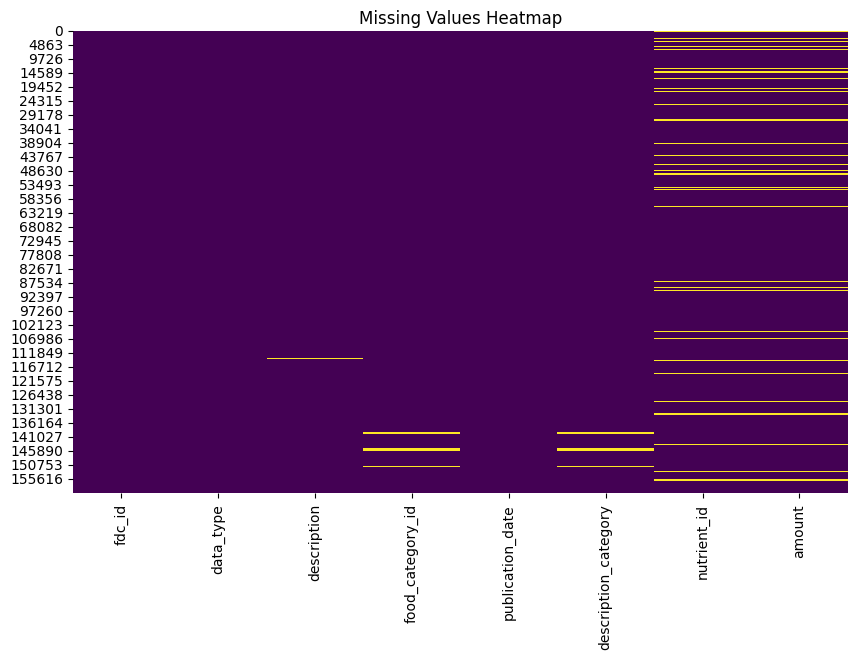

In [ ]:
# Count missing values in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Visualize missing data as a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
# Option 1: Fill missing numerical values with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Option 2: Fill missing categorical values with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Number of duplicate rows: 0
Shape after removing duplicates: (160478, 8)


In [ ]:
# Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Strip whitespace from string columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.title()  # Capitalize first letter

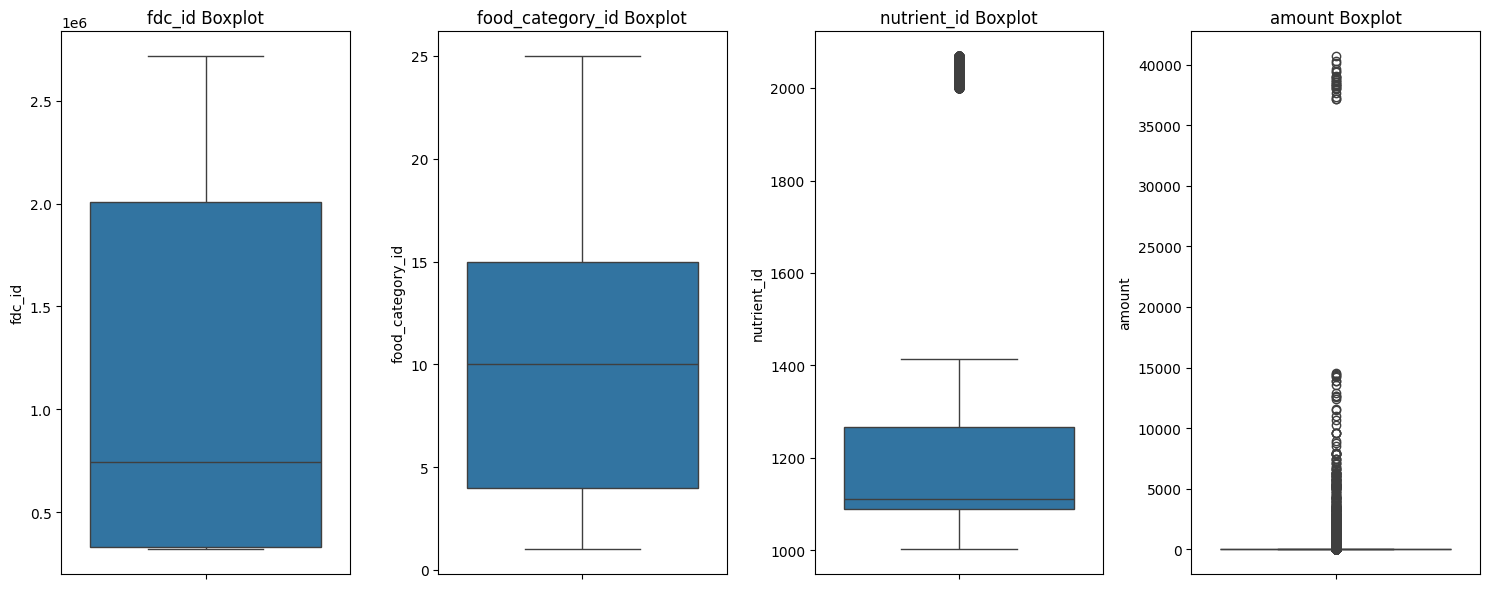

In [ ]:
# Visualize outliers for numerical columns
plt.figure(figsize=(15, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df[col])
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = np.abs(zscore(df[num_cols]))

# Define threshold for Z-score
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

print(f"\nNumber of rows with outliers: {outliers.sum()}")

# Option: Remove outliers
df_cleaned = df[~outliers]
print("Shape after removing outliers:", df_cleaned.shape)


Number of rows with outliers: 8947
Shape after removing outliers: (151531, 8)


In [ ]:
# Summary statistics and data types
print("\nFinal Summary:")
print(df_cleaned.describe())
print("\nData Types:")
print(df_cleaned.dtypes)


Final Summary:
             fdc_id  food_category_id    nutrient_id         amount
count  1.515310e+05     151531.000000  151531.000000  151531.000000
mean   1.080416e+06          9.506946    1150.407633      52.720549
std    9.178384e+05          6.282831     106.522033     192.151966
min    3.198740e+05          1.000000    1002.000000       0.000000
25%    3.300015e+05          4.000000    1089.000000       0.015000
50%    7.467730e+05         10.000000    1112.000000       0.480000
75%    2.005718e+06         15.000000    1259.000000       7.620000
max    2.715715e+06         25.000000    1414.000000    1770.000000

Data Types:
fdc_id                    int64
data_type                object
description              object
food_category_id        float64
publication_date         object
description_category     object
nutrient_id             float64
amount                  float64
dtype: object
